# COGS 108 - Final Project 

# Overview

For our COGS 108 project, we decided to analyze the crime rates on American (federal) holidays in Los Angeles. This city in particular was chosen by us since it contained a moderate amount of entries while having enough data to work with. We predicted that the rate of crime in Los Angeles would increase during these holidays.

# Names

- Vivian Pham
- Denzel Rodil
- Aaron Truong
- Angela Zhu
- Gigi Li
- Rui Qin


# Group Members IDs

- A12692885
- A12155756
- A13691652
- A14658765
- A13749379
- A14001686


# Research Question

***What is the influence of major (Federal mandated) holidays on crime rates in Los Angeles from 2015 to 2018?***
- The variable we are measuring is the date of each month regardless of whether there is an American (government mandated) holiday or not. We considered other variables such as gender and type of crime committed but concluded that including them would create a different project in itself. Since our topic is very broad, additional variables would only be needed for specific and unrelated topics. We also did not include holidays that were not mandated by the government such as Halloween and Valentine’s Day but we included them in our analysis.


## Background and Prior Work

The background of our dataset comes from a crime data census from 2010 to the present as well as crime stats for the region of San Diego. We planned to take a look to see if the time of year circulating around major holidays has a relationship with the crime rates in Los Angeles. There have been studies done in the past that look at the effect of different factors such as religion or seasons on the crime rate. In an article by Matthew Lee, they take a look into the influence of religious institutions on crime in rural areas. In another article by David McDowall about the seasonal cycle of crime, which found that there are in fact patterns and seasonal behaviors for major crime rates. It seems that seasonal behavior is influenced by environmental and social components that may vary based on location. This other research shows the influence of factors that influence crime in areas around the world. The seasonal patterns and the religious influences support the fact that there might be an influence of crime rates around major holidays or religious holidays that are apart of California’s seasonal pattern.

We chose to use federal holidays and did not decide to use holidays such as Easter or Halloween. We wanted to go a safe route by using holidays that are recognized by the US government.

- New Year’s Day (January 1)
- Birthday of Martin Luther King, Jr. (3rd Monday in January)
- Washington’s Birthday (3rd Monday in February)
- Memorial Day (last Monday in May)
- Independence Day (July 4)
- Labor Day (1st Monday in September)
- Columbus Day (2nd Monday in October)
- Veterans Day (November 11)
- Thanksgiving Day (4th Thursday in November)
- Christmas Day (December 25)

References (include links):
- 1) Matthew R. Lee, The Religious Institutional Base and Violent Crime in Rural Areas, https://www.jstor.org/stable/3838287?Search=yes&resultItemClick=true&searchText=crime&searchText=rates&searchText=on&searchText=major&searchText=holidays&searchUri=%2Faction%2FdoBasicSearch%3Facc%3Doff%26amp%3Bgroup%3Dnone%26amp%3Bwc%3Don%26amp%3BQuery%3Dcrime%2Brates%2Bon%2Bmajor%2Bholidays%26amp%3Bfc%3Doff&ab_segments=0%2Fdefault-2%2Fcontrol&refreqid=search%3A2058996b1f52923be5dbd27c54485e1e&seq=1#page_scan_tab_contents
- 2) David McDowall, Seasonal Cycles in Crime, and Their Variability, https://www.jstor.org/stable/43551937?Search=yes&resultItemClick=true&searchText=crime&searchText=rates&searchText=on&searchText=major&searchText=holidays&searchUri=%2Faction%2FdoBasicSearch%3Facc%3Doff%26amp%3Bgroup%3Dnone%26amp%3Bwc%3Don%26amp%3BQuery%3Dcrime%2Brates%2Bon%2Bmajor%2Bholidays%26amp%3Bfc%3Doff&ab_segments=0%2Fdefault-2%2Fcontrol&refreqid=search%3A2058996b1f52923be5dbd27c54485e1e&seq=1#page_scan_tab_contents

# Hypothesis


Our hypothesis was that there are more crimes committed on major (federal) holidays than on other days of the year (from 2015-2018).

We thought that the rate of crime would increase during the federal holidays because those opportunistic would want to commit the crimes during a time when most people aren’t working. If many people have work off during these federal holidays, we assumed that people who are planning to commit a crime would have an easier time doing so or have the time to do so.

# Dataset(s)

- Dataset Name: Crime Data from 2010 to Present
- Link to the dataset: https://catalog.data.gov/dataset/crime-data-from-2010-to-present
- Number of observations: 1,963,743 observations

- This dataset contains the variables such as date, time, and location of the crime and its report, type of crime committed (crime code), weapon used, victim age, and crime status code and description. This dataset specifically kept track of crimes in the Los Angeles area from 2010-to the present day. 

# Setup

Packages used for analysis: 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import patsy
import datetime as dt

# Data Cleaning

Import Data

In [3]:
df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")

Convert string variable "date" to three numerical variable "Year", "Month", and "Day". And add a column of ones which represent one crime happened.

In [4]:
df["time"] = df["Date Occurred"].str.split('/')
df["Year"] = pd.to_numeric(df["time"].str[2])
df["Month"] = pd.to_numeric(df["time"].str[0])
df["Day"] = pd.to_numeric(df["time"].str[1])
df.drop(columns=["time"], inplace = True)
df["date"] = df[["Month", "Day", "Year"]].values.tolist()
df["Num"] = np.ones(df.shape[0])
df = df.loc[(df["Year"] >= 2015) & (df["Year"] < 2019),:]

Define the holidays date as wrote above and create a column with boolean type to check if the day is a holiday.

In [5]:
Holi_2015 = ["01/01/2015", "01/19/2015", "02/16/2015", "05/25/2015", "07/04/2015", "09/07/2015", 
             "10/12/2015", "11/11/2015", "11/26/2015", "12/25/2015"]
Holi_2016 = ["01/01/2016", "01/18/2016", "02/15/2016", "05/30/2016", "07/04/2016", "09/05/2016", 
             "10/10/2016", "11/11/2016", "11/24/2016", "12/25/2016"]
Holi_2017 = ["01/01/2017", "01/16/2017", "02/20/2017", "05/29/2017", "07/04/2017", "09/04/2017", 
             "10/09/2017", "11/11/2017", "11/23/2017", "12/25/2017"]
Holi_2018 = ["01/01/2018", "01/15/2018", "02/19/2018", "05/28/2018", "07/04/2018", "09/03/2018", 
             "10/08/2018", "11/11/2018", "11/22/2018", "12/25/2018"]
holidays = Holi_2015 + Holi_2016 + Holi_2017 + Holi_2018
df["is_holiday"] = df["Date Occurred"].isin(holidays)

Calculate the number of crimes on every day during these four years and split the data into two groups: holidays and non-holidays.

In [6]:
num_crime_holiday_3 = df.groupby(["Date Occurred"]).sum().is_holiday.reset_index()
num_crime_holiday_3 = num_crime_holiday_3[num_crime_holiday_3["is_holiday"] != 0]
num_crime_nonholiday_3 = df.groupby(["Date Occurred"]).sum().Num - df.groupby(["Date Occurred"]).sum().is_holiday
num_crime_nonholiday_3 = num_crime_nonholiday_3.reset_index()
num_crime_nonholiday_3.columns=(["Date Occurred", "Num"])
num_crime_nonholiday_3 = num_crime_nonholiday_3[num_crime_nonholiday_3["Num"] != 0]

Calculate the average number of crimes per day in each month and split the data into two groups: holidays and non-holidays.

In [7]:
num_crime_holiday = df.groupby(["Month"]).sum().is_holiday
num_holidays = [2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1]
for i in range(1,13):
    if num_holidays[i-1] != 0:
        num_crime_holiday[i] = num_crime_holiday[i]/num_holidays[i-1]
num_crime_nonholiday = df.groupby(["Month"]).sum().Num - num_crime_holiday
num_nonholidays = [29, 27, 31, 30, 30, 30, 30, 31, 29, 30, 28, 30]
for i in range(1,13):
    num_crime_nonholiday[i] = num_crime_nonholiday[i]/num_nonholidays[i-1]
new_num_crime_holiday = num_crime_holiday.drop(labels=[3,4,6,8])
new_num_crime_nonholiday = num_crime_nonholiday.drop(labels=[3,4,6,8])
new_num_crime_holiday = new_num_crime_holiday/4
new_num_crime_nonholiday = new_num_crime_nonholiday/4

Test Normality of the number of crimes on every day during these four years

Text(0, 0.5, 'frequency')

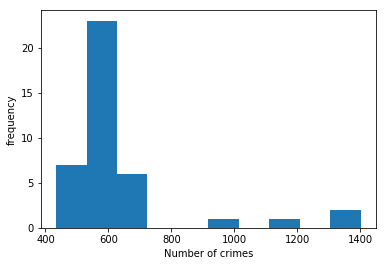

In [8]:
plt.hist(num_crime_holiday_3["is_holiday"])
plt.xlabel("Number of crimes")
plt.ylabel("frequency")

In [9]:
stats.normaltest(num_crime_holiday_3["is_holiday"])

NormaltestResult(statistic=39.047694599456534, pvalue=3.318186959469853e-09)

Text(0, 0.5, 'frequency')

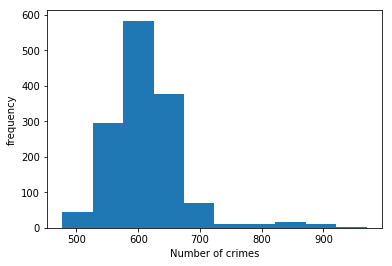

In [10]:
plt.hist(num_crime_nonholiday_3["Num"])
plt.xlabel("Number of crimes")
plt.ylabel("frequency")

In [11]:
stats.normaltest(num_crime_nonholiday_3["Num"])

NormaltestResult(statistic=566.779638671107, pvalue=8.421030397004243e-124)

Results of normality testing
- For number of crimes on holidays, since the p-value is less than the significance level 0.05, we reject the null hypothesis that the random variable is normally distributed.
- For number of crimes on non-holidays, since the p-value is less than the significance level 0.05, we reject the null hypothesis that the random variable is normally distributed.

# Data Analysis & Results

**Wilcoxon ranked sum test on the number of crimes that happened every day of last 4 years**
- Null hypothesis: the distribution of number of crimes on the holidays is the same as the distribution of number of crimes on the non holidays
- Alternative hypothesis: there is a shift between two distributions

In [12]:
stats.ranksums(num_crime_holiday_3["is_holiday"], num_crime_nonholiday_3["Num"])

RanksumsResult(statistic=-2.528366708779939, pvalue=0.011459458999327005)

Result of Wilcoxon ranked sum test:
- Since the p-value (0.027) is less than the significance level 0.05, we reject the null hypothesis. However, the statistic suggests that the number of crimes that happened on holidays is actually not as many as crimes that happened on non-holidays

**Wilcoxon signed rank test on the average number of crimes that happened every day in each month**

- Null hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is 0.
- Alternative hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is not 0

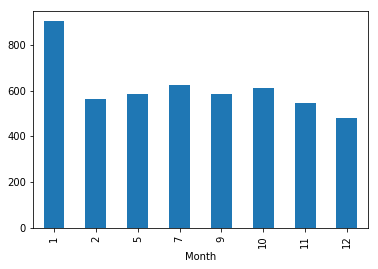

In [13]:
new_num_crime_holiday.plot(kind="bar")

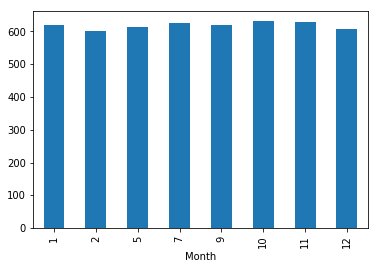

In [14]:
new_num_crime_nonholiday.plot(kind="bar")

In [15]:
stats.wilcoxon(list(new_num_crime_holiday), list(new_num_crime_nonholiday))

/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=8.0, pvalue=0.16142946236708333)

- Result of the Wilcoxon signed rank test: Since the p-value is larger than the signficance level 0.05, we fail to reject the null hypothesis. Then the test sugguests that average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is 0.

**The Monte Carlo Wilcoxon signed rank test**

Due to the limited size of data for Wilcoxon signed rank test, we decided to do the Monte Carlo Wilcoxon signed rank test.

- Null hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is 0
- Alternative hypothesis: Difference between the average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is not 0

In [16]:
diff = new_num_crime_holiday - new_num_crime_nonholiday
w_rand = []
for b in range(10000):
    sign = np.random.choice([-1,1], 8)
    srank = stats.rankdata(abs(diff))*sign
    w_rand.append(srank[srank>0].sum())
prob_larger = np.mean(10 <= np.array(w_rand))
prob_smaller = np.mean(10 >= np.array(w_rand))
p_value = 2*min([prob_larger, prob_smaller])

In [17]:
p_value

0.3176

- Result of the Wilcoxon signed rank test: Since the p-value is larger than the signficance level 0.05, we fail to reject the null hypothesis. Then the test sugguests that average number of crimes that happened on holidays and the average number of crimes that happened on non-holidays is 0.

**Linear Regression (if Necessary)**

In [18]:
num_crime_holiday_3["Date Occurred"] = pd.to_datetime(num_crime_holiday_3["Date Occurred"])
num_crime_nonholiday_3["Date Occurred"] = pd.to_datetime(num_crime_nonholiday_3["Date Occurred"])
num_crime_holiday_3["Date Occurred"] = num_crime_holiday_3["Date Occurred"].map(dt.datetime.toordinal)
num_crime_nonholiday_3["Date Occurred"] = num_crime_nonholiday_3["Date Occurred"].map(dt.datetime.toordinal)
num_crime_holiday_3 = num_crime_holiday_3.sort_values(by="Date Occurred")
num_crime_nonholiday_3 = num_crime_nonholiday_3.sort_values(by="Date Occurred")

Linear regression on number of crimes that happened on holidays

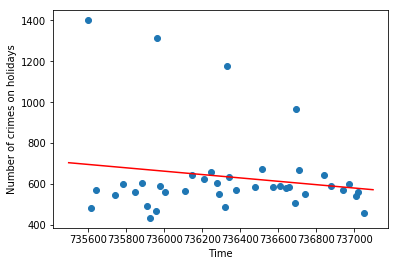

In [19]:
x = num_crime_holiday_3["Date Occurred"]
y = num_crime_holiday_3["is_holiday"]
x_m = np.column_stack((np.ones(len(x)),x))
y_m = np.matrix(y)
W = np.linalg.inv(x_m.T.dot(x_m)).dot(x_m.T).dot(y)
plt.scatter(x, y)
x_s = np.linspace(735500, 737100, 1000)
plt.plot(x_s, W[0] + W[1]*x_s, color = "r")
plt.xlabel("Time")
plt.ylabel("Number of crimes on holidays")
plt.show()

Linear regression on number of crimes that happened on non-holidays

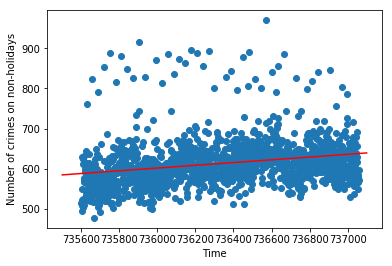

In [20]:
x = num_crime_nonholiday_3["Date Occurred"]
y = num_crime_nonholiday_3["Num"]
x_m = np.column_stack((np.ones(len(x)),x))
y_m = np.matrix(y)
W = np.linalg.inv(x_m.T.dot(x_m)).dot(x_m.T).dot(y)
plt.scatter(x, y)
x_s = np.linspace(735500, 737100, 1000)
plt.plot(x_s, W[0] + W[1]*x_s, color = "r")
plt.xlabel("Time")
plt.ylabel("Number of crimes on non-holidays")
plt.show()

# Ethics & Privacy

- What are the unintended consequences and how will you guard against these?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (eg does your data exclude particular populations or is it likely to reflect particular human biases in a way that could be a problem?)

Our primary source was data.gov which is open data given by the U.S. government itself but our dataset is listed as a Non-Federal dataset covered by different Terms of Use than Data.gov. The data is transcribed from original crime reports typed on paper (from the Los Angeles Police Department) so it was noted that there would be some inaccuracies with the data. Creative Commons (the organization publishing the dataset) states that they make no warranties regarding the use of their information and therefore allows us to use the dataset without any supervision. Since this dataset is available to everyone online, there are no issues with data privacy. The way we are using the dataset is not for commercial purposes so no profit would be made from our findings. Address fields in the dataset were provided to the nearest hundred block to maintain privacy but for our analysis we did not use this information.

# Conclusion & Discussion

Our hypothesis was that there would be more crimes committed on major (government mandated) holidays than those on other days. We gathered and studied police reports from the city of Los Angeles from years 2015 to 2018. With our data and analysis we found out that there was no correlation between major holidays and the number of crimes committed. Instead, we found that more crimes were committed on the first day of each month compared to the rest of the days in the month. Some limitations with our project could be that some crime reports were not reported or withheld from the public. Our work on the correlation between crimes and holidays can help society become safe by alerting people to be more careful on some days than others …

Limitation of analysis